In [2]:
import pandas as pd
import seaborn as sns

In [3]:
retail_clean = pd.read_csv('retail_clean.csv')

In [4]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [5]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [6]:
retail_clean['date']

0        2009-12-01
1        2009-12-01
2        2009-12-01
3        2009-12-01
4        2009-12-01
            ...    
779490   2011-12-09
779491   2011-12-09
779492   2011-12-09
779493   2011-12-09
779494   2011-12-09
Name: date, Length: 779495, dtype: datetime64[ns]

In [7]:
retail_clean['month'] = retail_clean['date'].dt.month
retail_clean['year'] = retail_clean['date'].dt.year
retail_clean['week'] = retail_clean['date'].dt.isocalendar().week

In [8]:
time_series = retail_clean.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_revenue = ('Revenue', 'sum')).sort_values('date', ascending = True).reset_index()

In [9]:
time_series.to_excel('timeseries.xlsx')

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
import numpy as np

In [12]:
time_series['trend'] = pd.DataFrame(np.arange(1, len(time_series)+1, 1))
time_series['month'] = time_series['month'].astype('category')

In [13]:
time_series

,week,month,year,date,total_revenue,trend
0,49,12,2009,2009-12-01,232177.51,1
1,50,12,2009,2009-12-07,207908.73,2
2,51,12,2009,2009-12-14,207685.87,3
3,52,12,2009,2009-12-21,35731.90,4
4,1,1,2010,2010-01-04,167636.95,5
...,...,...,...,...,...,...
116,46,11,2011,2011-11-14,276216.98,117
117,47,11,2011,2011-11-21,248234.58,118
118,48,11,2011,2011-11-28,141669.57,119
119,48,12,2011,2011-12-01,109163.47,120


In [14]:
X = time_series.drop(['week', 'year', 'date', 'total_revenue'], axis = 1)

In [15]:
names = pd.get_dummies(X).columns
names

Index(['trend', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [16]:
X = pd.get_dummies(X).values

In [17]:
X

array([[1, False, False, ..., False, False, True],
       [2, False, False, ..., False, False, True],
       [3, False, False, ..., False, False, True],
       ...,
       [119, False, False, ..., False, True, False],
       [120, False, False, ..., False, False, True],
       [121, False, False, ..., False, False, True]], dtype=object)

In [18]:
y = time_series['total_revenue'].values
y

array([232177.51 , 207908.73 , 207685.87 ,  35731.9  , 167636.95 ,
       125493.61 , 119473.351, 143198.761, 112299.692,  80059.66 ,
       160506.402, 151693.202, 151813.96 , 118785.1  , 164459.771,
       172063.68 ,  89855.96 ,  28646.66 , 124314.76 , 141539.381,
       138922.62 , 158558.581,  12342.17 , 149102.83 , 155673.54 ,
       138681.57 , 142033.27 ,  90358.06 , 200239.71 , 126987.39 ,
       103924.84 , 114861.13 ,  55932.44 , 136775.12 , 144495.58 ,
       133616.   , 118917.03 ,  30637.95 , 117866.37 , 139842.07 ,
       154786.91 , 136279.55 ,  22811.75 , 100807.8  , 119333.94 ,
       155778.921, 223587.04 , 229506.25 ,  72886.41 , 243007.44 ,
       298614.04 , 220882.67 , 197721.45 , 262597.86 , 282707.701,
       261610.061, 246492.99 , 113051.41 , 148627.97 , 212619.13 ,
       163116.12 ,  46059.51 , 114636.8  , 154344.85 , 175452.23 ,
       104861.   ,  18806.43 ,  87149.38 ,  87827.94 , 125700.15 ,
       130380.77 ,  15026.68 , 102360.14 , 112193.93 , 137669.

In [19]:
model = LinearRegression()

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [22]:
model.coef_

array([-7.50587618e+00, -1.85162279e+04, -3.77331573e+04, -1.42433897e+04,
       -3.72762502e+04, -2.73256065e+04, -1.35913538e+04, -2.43256353e+04,
       -2.98789922e+04,  3.48536846e+04,  4.50119036e+04,  8.92286442e+04,
        3.37963804e+04])

In [23]:
dict1 = list(zip(names, model.coef_))
dict1

[('trend', -7.505876175645656),
 ('month_1', -18516.22787910629),
 ('month_2', -37733.15733208401),
 ('month_3', -14243.3897442747),
 ('month_4', -37276.25016339645),
 ('month_5', -27325.606453991306),
 ('month_6', -13591.35376355216),
 ('month_7', -24325.635282673957),
 ('month_8', -29878.992237689366),
 ('month_9', 34853.68461717034),
 ('month_10', 45011.903599302794),
 ('month_11', 89228.64421701457),
 ('month_12', 33796.38042328061)]

In [24]:
prediction = model.predict(X)

In [25]:
time_series['prediction'] = prediction

C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='total_revenue'>

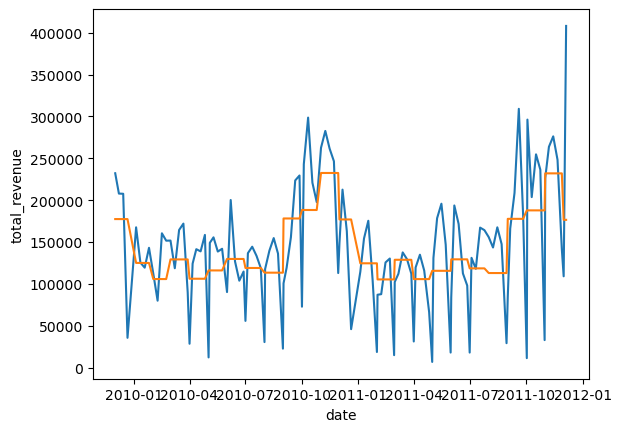

In [26]:
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['total_revenue'])
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['prediction'])

In [27]:
max_date = time_series['date'].max()
max_date

Timestamp('2011-12-05 00:00:00')

In [28]:
dates = pd.DataFrame({'date': pd.date_range(start = '2011-12-05', end = '2012-02-05', freq = 'W')})

In [29]:
dates

,date
0,2011-12-11
1,2011-12-18
2,2011-12-25
3,2012-01-01
4,2012-01-08
5,2012-01-15
6,2012-01-22
7,2012-01-29
8,2012-02-05


In [30]:
time_series = pd.concat([time_series, dates], axis = 0).reset_index()

In [31]:
time_series

,index,week,month,year,date,total_revenue,trend,prediction
0,0,49,12,2009.0,2009-12-01,232177.51,1.0,177476.051819
1,1,50,12,2009.0,2009-12-07,207908.73,2.0,177468.545943
2,2,51,12,2009.0,2009-12-14,207685.87,3.0,177461.040067
3,3,52,12,2009.0,2009-12-21,35731.90,4.0,177453.534191
4,4,1,1,2010.0,2010-01-04,167636.95,5.0,125133.420012
...,...,...,...,...,...,...,...,...
125,4,<NA>,NaN,NaN,2012-01-08,NaN,NaN,NaN
126,5,<NA>,NaN,NaN,2012-01-15,NaN,NaN,NaN
127,6,<NA>,NaN,NaN,2012-01-22,NaN,NaN,NaN
128,7,<NA>,NaN,NaN,2012-01-29,NaN,NaN,NaN


In [32]:
time_series['trend'] = pd.DataFrame(np.arange(1, len(time_series)+1, 1))
time_series['month'] = time_series['date'].dt.month
time_series['month'] = time_series['month'].astype('category')

In [33]:
time_series

,index,week,month,year,date,total_revenue,trend,prediction
0,0,49,12,2009.0,2009-12-01,232177.51,1,177476.051819
1,1,50,12,2009.0,2009-12-07,207908.73,2,177468.545943
2,2,51,12,2009.0,2009-12-14,207685.87,3,177461.040067
3,3,52,12,2009.0,2009-12-21,35731.90,4,177453.534191
4,4,1,1,2010.0,2010-01-04,167636.95,5,125133.420012
...,...,...,...,...,...,...,...,...
125,4,<NA>,1,NaN,2012-01-08,NaN,126,NaN
126,5,<NA>,1,NaN,2012-01-15,NaN,127,NaN
127,6,<NA>,1,NaN,2012-01-22,NaN,128,NaN
128,7,<NA>,1,NaN,2012-01-29,NaN,129,NaN


In [34]:
X = time_series.drop(['index', 'week', 'year', 'date', 'total_revenue', 'prediction'], axis = 1)
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
y = time_series['total_revenue'].values

In [35]:
prediction = model.predict(X)
time_series['prediction'] = prediction

C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thanh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='total_revenue'>

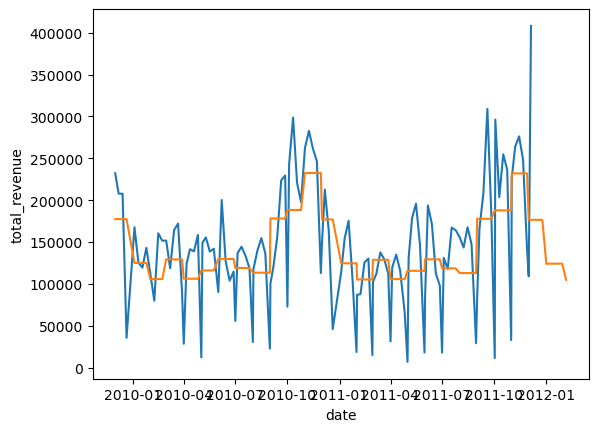

In [36]:
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['total_revenue'])
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['prediction'])